### Natural language processing

In [ ]:
import gensim


model = gensim.models.KeyedVectors.load_word2vec_format('/data/datasets/thema10/BioSentVec.vec.bin', binary=True)


print(f"Aantal woorden in het model: {len(model.key_to_index)}")



Aantal woorden in het model: 16545452


In [5]:
import numpy as np

def cosine_similarity(vector1, vector2):
    """Bereken de cosinusgelijkheid tussen twee vectoren."""
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))


In [28]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_sentence(sentence):
    """Verwerk de zin: verwijder hoofdletters, interpunctie en stopwoorden."""
    
    sentence = sentence.lower()
    
    
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    
    
    words = sentence.split()
    
    
    words = [word for word in words if word not in stop_words]
    
    return words


[nltk_data] Downloading package stopwords to
[nltk_data]     /homes/jrgommers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def embed_sentence(sentence, model):
    """Converteer een zin naar een gemiddelde woordembedding."""
    tokens = preprocess_sentence(sentence)
    vectors = []
    
    for token in tokens:
        if token in model.key_to_index:  
            vectors.append(model[token])
    
    if vectors:  
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  


In [30]:

sentence1 = "Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis."
sentence2 = "Breast cancers with HER2 amplification are more aggressive, have a higher risk of CNS metastasis, and poorer prognosis."


embedding1 = embed_sentence(sentence1, model)
embedding2 = embed_sentence(sentence2, model)


similarity = cosine_similarity(embedding1, embedding2)

print(f"Cosinusgelijkheid tussen de twee zinnen: {similarity}")


Cosinusgelijkheid tussen de twee zinnen: 0.9936835169792175


In [31]:
from sklearn.decomposition import PCA

def compute_pca(X, n_components=2):
    """Verminder de dimensionaliteit van de embeddings naar n_components dimensies."""
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)


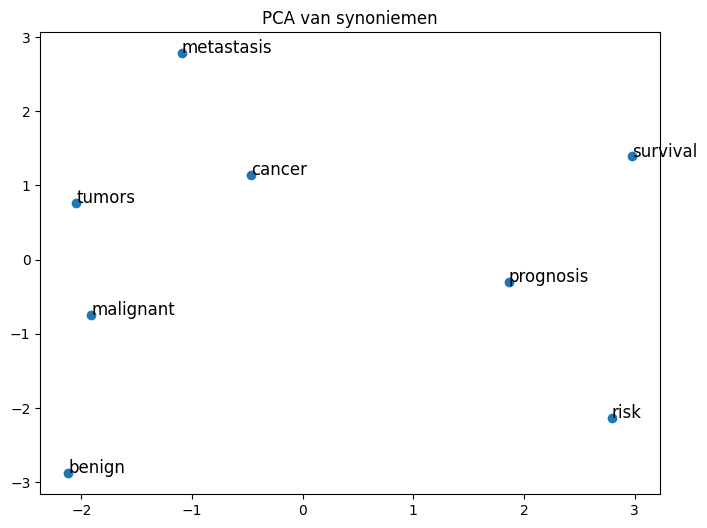

In [32]:
import matplotlib.pyplot as plt


words = ['cancer', 'risk', 'metastasis', 'prognosis', 'tumors', 'survival', 'benign', 'malignant']


embeddings = np.array([model[word] for word in words if word in model.key_to_index])


pca_result = compute_pca(embeddings, n_components=2)


plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])


for i, word in enumerate(words):
    if word in model.key_to_index:
        plt.text(pca_result[i, 0], pca_result[i, 1], word, fontsize=12)

plt.title("PCA van synoniemen")
plt.show()
